# SCFI


![](https://i.postimg.cc/4yw6mBtC/AKbyq-TKUkics-YGx3xwe3-HA.jpg)
>Hello and Welcome to Kaggle

# Import Library

In [ ]:
pip install catboost

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_predict, KFold, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import VotingClassifier, StackingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

# Load data

In [ ]:
train_data = pd.read_csv('/content/train.csv')
test_data = pd.read_csv('/content/train.csv')

In [ ]:
train_data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [ ]:
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


# Data Preprocssing

In [ ]:
# Split Cabin info into deck and side

train_decks, test_decks = [], []
train_sides, test_sides = [], []

for i in train_data['Cabin']:
    if(type(i) == str):
        train_decks.append(i[0])
        train_sides.append(i[-1])
    else:
        train_decks.append(None)
        train_sides.append(None)


for i in test_data['Cabin']:
    if(type(i) == str):
        test_decks.append(i[0])
        test_sides.append(i[-1])
    else:
        test_decks.append(None)
        test_sides.append(None)

train_data['Deck'] = train_decks
test_data['Deck'] = test_decks
train_data['Side'] = train_sides
test_data['Side'] = test_sides



In [ ]:
# Check empty/NaN cells

print("Training Data")
print(train_data.isnull().sum())

print("\nTest Data")
print(test_data.isnull().sum())

Training Data
PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
Deck            199
Side            199
dtype: int64

Test Data
PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
Deck            199
Side            199
dtype: int64


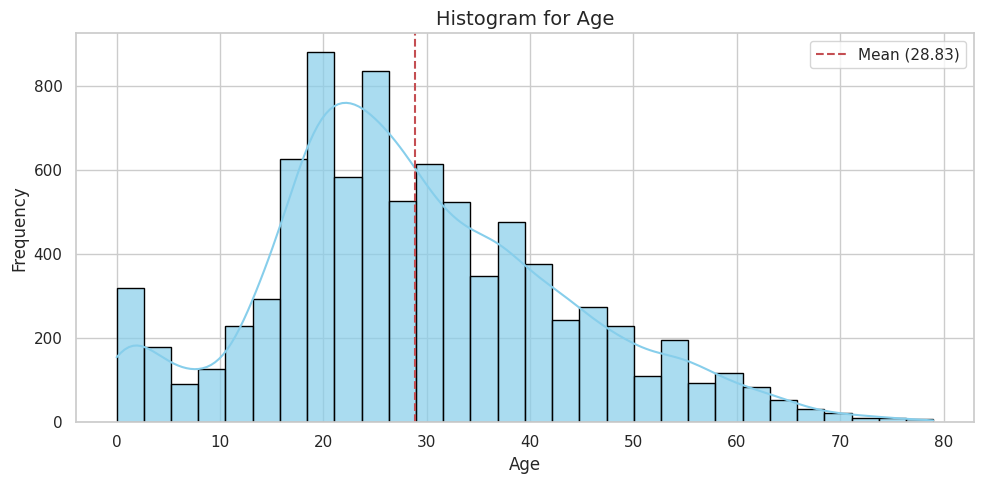

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set a nicer theme for plots
sns.set_theme(style="whitegrid")

# Example non-categorical features
non_categorical_f = ['Age' ]

# Assuming `train_data` is the DataFrame you are plotting
for column in non_categorical_f:
    plt.figure(figsize=(10, 5))

    # Handle skewed data: Apply a log transformation if necessary
    data = train_data[column].dropna()  # Drop missing values
    if data.max() > 1000:  # Threshold for log scaling (adjust as needed)
        data = np.log10(data + 1)  # Add 1 to avoid log(0)

    # Create the histogram
    sns.histplot(data, kde=True, bins=30, color="skyblue", edgecolor="black", alpha=0.7)

    # Add the mean line
    plt.axvline(data.mean(), color='r', linestyle='--', label=f'Mean ({data.mean():.2f})')

    # Customize labels and title
    plt.title(f'Histogram for {column}', fontsize=14)
    plt.xlabel(f'{column} (log-transformed)' if data.max() < train_data[column].max() else column, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.legend()
    plt.tight_layout()
    plt.show()



# Data Visulazation

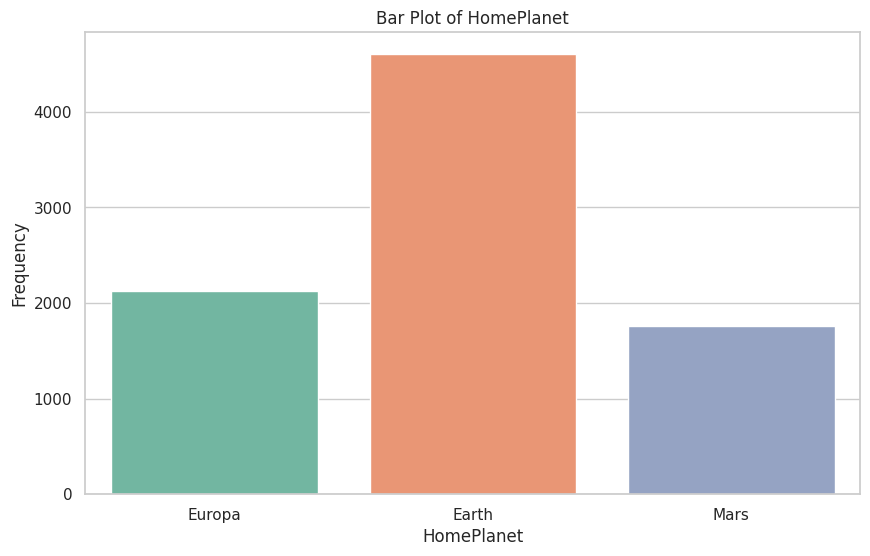

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a bar plot
sns.countplot(x='HomePlanet', data=train_data, palette='Set2')
# Set the title and labels
plt.title('Bar Plot of HomePlanet')
plt.xlabel('HomePlanet')
plt.ylabel('Frequency')

# Show the plot
plt.show()

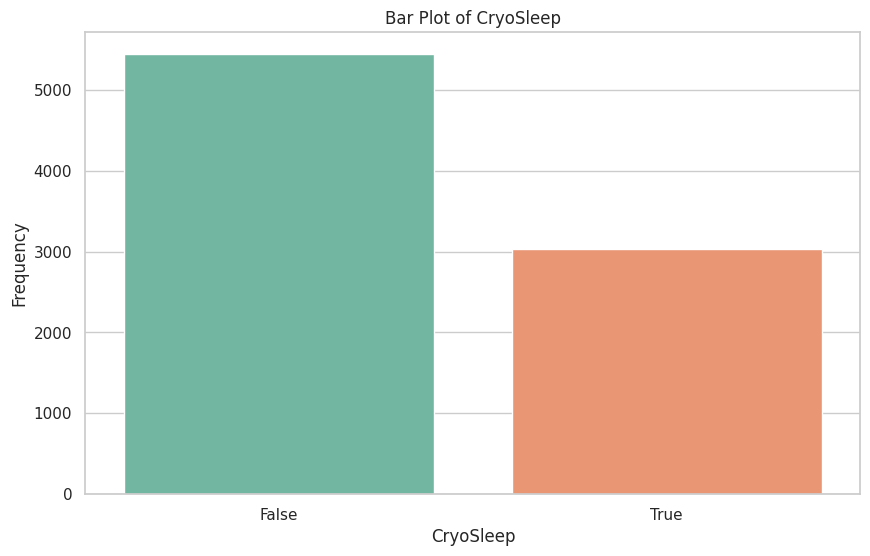

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a bar plot
# Removed trailing tab character or spaces from the column name
sns.countplot(x='CryoSleep', data=train_data, palette='Set2')
# Set the title and labels
plt.title('Bar Plot of CryoSleep')
plt.xlabel('CryoSleep')
plt.ylabel('Frequency')

# Show the plot
plt.show()

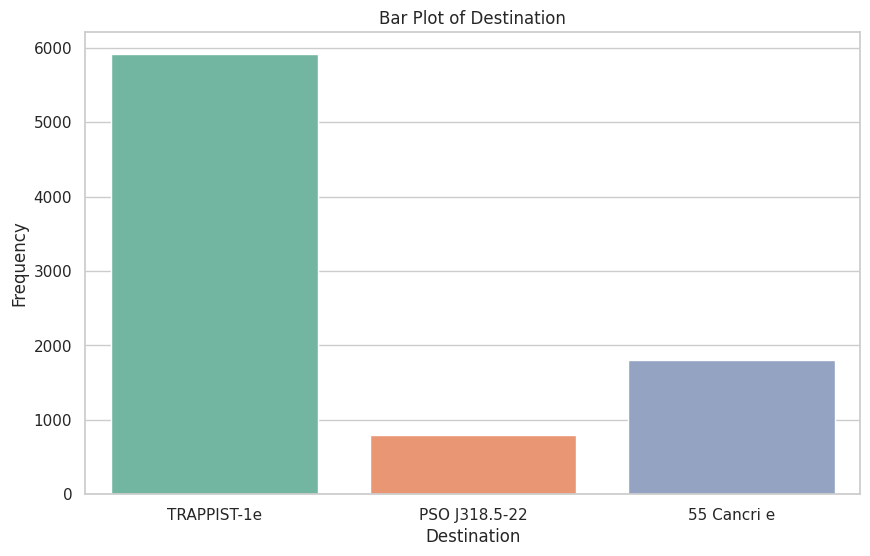

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a bar plot
sns.countplot(x='Destination', data=train_data, palette='Set2')
# Set the title and labels
plt.title('Bar Plot of Destination')
plt.xlabel('Destination')
plt.ylabel('Frequency')

# Show the plot
plt.show()

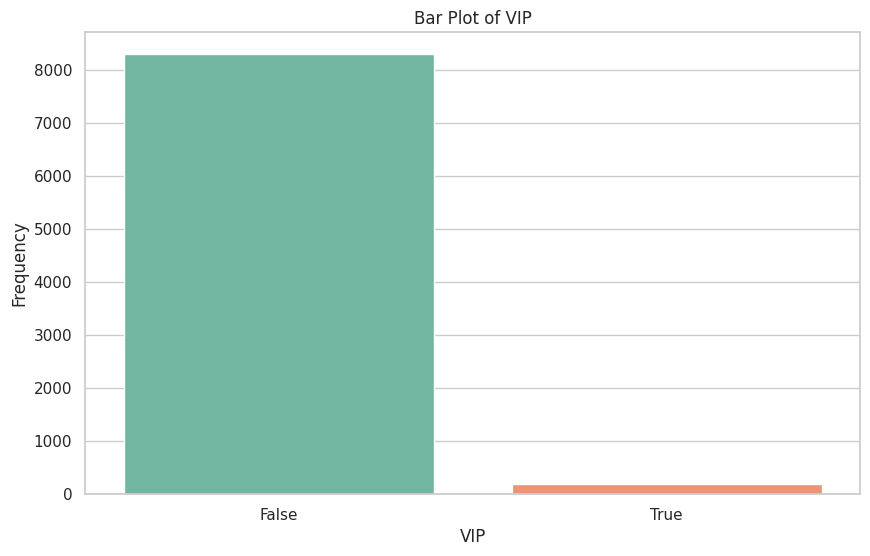

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a bar plot
# Removed trailing tab character or spaces from the column name
sns.countplot(x='VIP', data=train_data, palette='Set2')
# Set the title and labels
plt.title('Bar Plot of VIP')
plt.xlabel('VIP')
plt.ylabel('Frequency')

# Show the plot
plt.show()

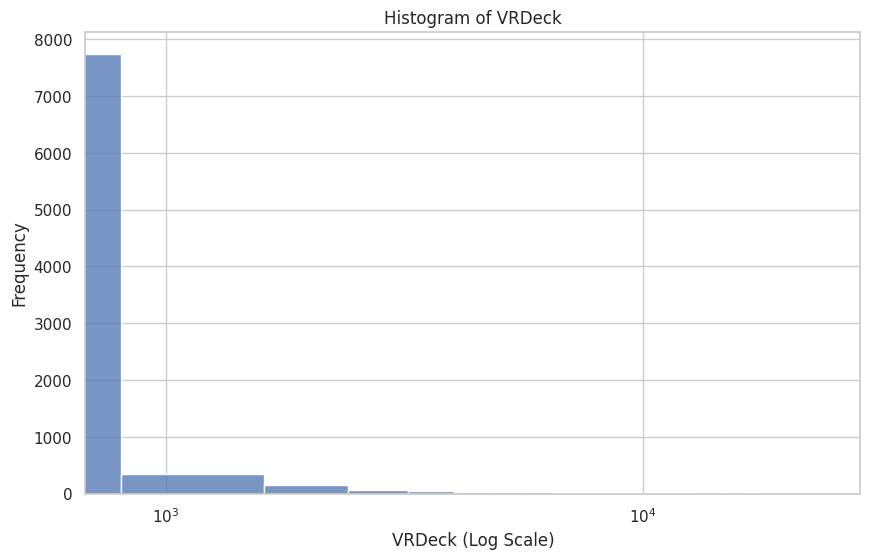

In [ ]:
plt.figure(figsize=(10, 6))

# Create a histogram plot
sns.histplot(x='VRDeck', data=train_data, bins=30)

# Set the title and labels
plt.title('Histogram of VRDeck')
plt.xlabel('VRDeck (Log Scale)')
plt.ylabel('Frequency')

# Set the x-axis to a logarithmic scale
plt.xscale('log')

# Show the plot
plt.show()

In [ ]:
import plotly.express as px

# Create an enhanced violin plot
fig = px.violin(
    train_data,
    x='HomePlanet',
    y='VRDeck',
    color='HomePlanet',  # Differentiate groups by color
    box=True,  # Add box plot inside the violin
    points="all",  # Show all data points
    hover_data=['Age', 'RoomService', 'FoodCourt'],  # Add more context for hover information
    title='Violin Plot of VRDeck by Home Planet',
    labels={'VRDeck': 'VR Deck Spendings', 'HomePlanet': 'Home Planet'}  # Add readable labels
)

# Customize the layout for better aesthetics
fig.update_layout(
    title_font_size=18,
    xaxis_title_font_size=14,
    yaxis_title_font_size=14,
    legend_title_text='Home Planet',
    template='plotly_white',  # Use a clean background theme
    violingap=0.5,  # Add space between violins
    violinmode='group'  # Group violins side by side
)

# Add a y-axis range to focus on typical values
fig.update_yaxes(range=[0, 3000])  # Adjust based on data

# Show the plot
fig.show()



In [ ]:

import plotly.express as px

# Create an interactive violin plot
fig = px.violin(train_data, x='Destination', y='VRDeck', box=True, points="all",
                 title='Violin Plot of VRDeck by Destination')

# Show the plot
fig.show()



# Feature Engineering

In [ ]:
# create group column
train_data['Group'] = train_data['PassengerId'].str.split('_').str[1]
# Create a new column 'TotalExpenditure' by summing all expenditure columns
train_data['TotalExpenditure'] = train_data[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(axis=1)
# Split the 'Cabin' column into 'Deck', 'Num', and 'Side'
train_data[['Deck', 'Num', 'Side']] = train_data['Cabin'].str.split('/', expand=True)
# Convert the 'Num' column to numeric
train_data['Num'] = pd.to_numeric(train_data['Num'], errors='coerce')

In [ ]:
for column in train_data.columns:
    unique_values = train_data[column].unique()
    print(f"Column: {column}")
    print(f"Unique Values: {unique_values}")
    print("\n")

Column: PassengerId
Unique Values: ['0001_01' '0002_01' '0003_01' ... '9279_01' '9280_01' '9280_02']


Column: HomePlanet
Unique Values: ['Europa' 'Earth' 'Mars' nan]


Column: CryoSleep
Unique Values: [False True nan]


Column: Cabin
Unique Values: ['B/0/P' 'F/0/S' 'A/0/S' ... 'G/1499/S' 'G/1500/S' 'E/608/S']


Column: Destination
Unique Values: ['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e' nan]


Column: Age
Unique Values: [39. 24. 58. 33. 16. 44. 26. 28. 35. 14. 34. 45. 32. 48. 31. 27.  0.  1.
 49. 29. 10.  7. 21. 62. 15. 43. 47.  2. 20. 23. 30. 17. 55.  4. 19. 56.
 nan 25. 38. 36. 22. 18. 42. 37. 13.  8. 40.  3. 54.  9.  6. 64. 67. 61.
 50. 41. 57. 11. 52. 51. 46. 60. 63. 59.  5. 79. 68. 74. 12. 53. 65. 71.
 75. 70. 76. 78. 73. 66. 69. 72. 77.]


Column: VIP
Unique Values: [False True nan]


Column: RoomService
Unique Values: [   0.  109.   43. ... 1569. 8586.  745.]


Column: FoodCourt
Unique Values: [   0.    9. 3576. ... 3208. 6819. 4688.]


Column: ShoppingMall
Unique Values: [ 

# Missing homeplanet

In [ ]:

# Fill missing 'HomePlanet' values based on the most common HomePlanet within each group
for group in train_data['Group'].unique():
    mode_homeplanet = train_data.loc[train_data['Group'] == group, 'HomePlanet'].mode()
    if not mode_homeplanet.empty:
        train_data.loc[(train_data['Group'] == group) & (train_data['HomePlanet'].isnull()), 'HomePlanet'] = mode_homeplanet[0]

# Cryposleep

In [ ]:
# Fill missing 'CryoSleep' values based on 'TotalExpenditure'
# If 'TotalExpenditure' is 0, set 'CryoSleep' to True; otherwise, set to False
train_data.loc[train_data['CryoSleep'].isnull(), 'CryoSleep'] = train_data['TotalExpenditure'] == 0

# Deck' and 'Side

In [ ]:

# Fill missing 'Deck' and 'Side' values using the mode within each group
for group in train_data['Group'].unique():
    mode_deck = train_data.loc[train_data['Group'] == group, 'Deck'].mode()
    mode_side = train_data.loc[train_data['Group'] == group, 'Side'].mode()

    if not mode_deck.empty:
        train_data.loc[(train_data['Group'] == group) & (train_data['Deck'].isnull()), 'Deck'] = mode_deck[0]
    if not mode_side.empty:
        train_data.loc[(train_data['Group'] == group) & (train_data['Side'].isnull()), 'Side'] = mode_side[0]

# Impute 'Num' with a simple strategy, like filling with the median
train_data['Num'] =train_data['Num'].fillna(train_data['Num'].median())

# Combine 'Deck', 'Num', and 'Side' back into 'Cabin'
train_data['Cabin'] =train_data['Deck'] + '/' + train_data['Num'].astype(str) + '/' + train_data['Side']

# Destination' values

In [ ]:
# Fill missing 'Destination' values based on the most common value within each group
for group in train_data['Group'].unique():
    mode_destination = train_data.loc[train_data['Group'] == group, 'Destination'].mode()

    if not mode_destination.empty:
        train_data.loc[(train_data['Group'] == group) & (train_data['Destination'].isnull()), 'Destination'] = mode_destination[0]

# Age

In [ ]:
# Fill missing 'Age' values using the median within each 'HomePlanet'
for planet in train_data['HomePlanet'].unique():
    median_age =  train_data.loc[ train_data['HomePlanet'] == planet, 'Age'].median()
    train_data.loc[( train_data['HomePlanet'] == planet) & ( train_data['Age'].isnull()), 'Age'] = median_age

# VIP

In [ ]:

train_data['VIP'].fillna(train_data['VIP'].mode()[0], inplace=True)

# Calculate 1/5 of 'TotalExpenditure

In [ ]:

expenditure_fraction = train_data['TotalExpenditure'] / 5

# Fill missing values in each spending-related column with 1/5 of 'TotalExpenditure'
train_data['RoomService'].fillna(expenditure_fraction, inplace=True)
train_data['FoodCourt'].fillna(expenditure_fraction, inplace=True)
train_data['ShoppingMall'].fillna(expenditure_fraction, inplace=True)
train_data['Spa'].fillna(expenditure_fraction, inplace=True)
train_data['VRDeck'].fillna(expenditure_fraction, inplace=True)

In [ ]:

train_data = train_data.drop(columns=['Name'])
train_data= train_data.drop(columns=['Cabin'])
train_data = train_data.drop(columns=['PassengerId'])

In [ ]:
train_data.isnull().sum()

,0
HomePlanet,0
CryoSleep,0
Destination,0
Age,0
VIP,0
RoomService,0
FoodCourt,0
ShoppingMall,0
Spa,0
VRDeck,0


In [ ]:
train_data.head(10)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Side,Group,TotalExpenditure,Num
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,P,01,0.0,0.0
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,S,01,736.0,0.0
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,S,01,10383.0,0.0
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,S,02,5176.0,0.0
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,S,01,1091.0,1.0
5,Earth,False,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,True,F,P,01,774.0,0.0
6,Earth,False,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,True,F,S,01,1584.0,2.0
7,Earth,True,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,0.0,True,G,S,02,0.0,0.0
8,Earth,False,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,True,F,S,01,1018.0,3.0
9,Europa,True,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,True,B,P,01,0.0,1.0


# Feature encoding

In [ ]:
train_data['CryoSleep'] = train_data['CryoSleep'].astype(bool)

In [ ]:

train_data = pd.get_dummies(train_data, columns=['HomePlanet', 'Destination','Deck', 'Side','Group'])

In [ ]:

bins = [0, 18, 25, 35, 45, 55, 65, 100]
labels = ['0-18', '19-25', '26-35', '36-45', '46-55', '56-65', '66-100']

# Create a new column 'AgeGroup' with the binned values
train_data['AgeGroup'] = pd.cut(train_data['Age'], bins=bins, labels=labels, right=False)

train_data = train_data.drop(columns=['Age'])

# One-hot encode the 'AgeGroup' column

train_data = pd.get_dummies(train_data, columns=['AgeGroup'], prefix='AgeGroup')

In [ ]:
# Identify all columns with boolean (True/False) values
boolean_columns = train_data.select_dtypes(include=['bool']).columns

# Convert boolean columns to integers (0 and 1)
train_data[boolean_columns] = train_data[boolean_columns].astype(int)
train_data.head()

,CryoSleep,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,TotalExpenditure,Num,...,Group_06,Group_07,Group_08,AgeGroup_0-18,AgeGroup_19-25,AgeGroup_26-35,AgeGroup_36-45,AgeGroup_46-55,AgeGroup_56-65,AgeGroup_66-100
0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,109.0,9.0,25.0,549.0,44.0,1,736.0,0.0,...,0,0,0,0,1,0,0,0,0,0
2,0,1,43.0,3576.0,0.0,6715.0,49.0,0,10383.0,0.0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0.0,1283.0,371.0,3329.0,193.0,0,5176.0,0.0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,303.0,70.0,151.0,565.0,2.0,1,1091.0,1.0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
print(train_data.columns)

Index(['CryoSleep', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa',
       'VRDeck', 'Transported', 'TotalExpenditure', 'Num', 'HomePlanet_Earth',
       'HomePlanet_Europa', 'HomePlanet_Mars', 'Destination_55 Cancri e',
       'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'Deck_A',
       'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G', 'Deck_T',
       'Side_P', 'Side_S', 'Group_01', 'Group_02', 'Group_03', 'Group_04',
       'Group_05', 'Group_06', 'Group_07', 'Group_08', 'AgeGroup_0-18',
       'AgeGroup_19-25', 'AgeGroup_26-35', 'AgeGroup_36-45', 'AgeGroup_46-55',
       'AgeGroup_56-65', 'AgeGroup_66-100'],
      dtype='object')


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

# Define your feature columns and target
features = ['Name', 'Deck', 'Side', 'Group', 'TotalExpenditure']
target = 'Transported'

# Define the numerical and categorical columns
numerical_cols = ['TotalExpenditure']
categorical_cols = ['Deck', 'Side', 'Group']

# Create the preprocessing pipeline
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Now you can create a full pipeline that includes your model
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    # Add your model here, e.g., ('classifier', SomeClassifier())
])

In [ ]:
print(model_pipeline)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['TotalExpenditure']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_un

In [ ]:
model_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['TotalExpenditure']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Deck', 'Side',
                                                   'Group'])]))])

# Data anaylsis

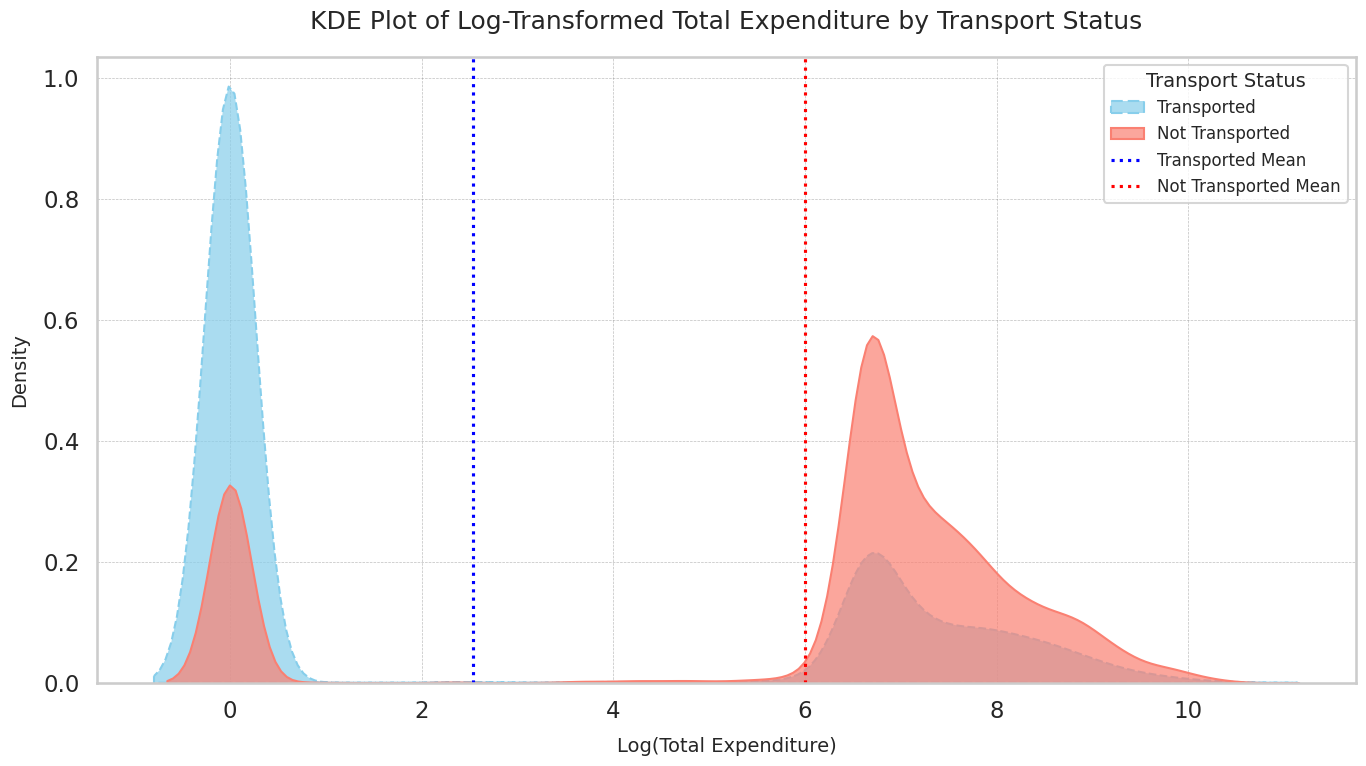

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Log-transform TotalExpenditure to reduce the impact of outliers
train_data['LogTotalExpenditure'] = np.log1p(train_data['TotalExpenditure'])

# Set a modern style and adjust aesthetics
sns.set_theme(style="whitegrid", context="talk")

plt.figure(figsize=(14, 8))

# KDE plot for the "Transported" group
sns.kdeplot(
    data=train_data[train_data['Transported'] == 1]['LogTotalExpenditure'],
    label='Transported',
    shade=True,
    color='skyblue',
    alpha=0.7,
    bw_adjust=0.4,  # Adjust bandwidth for smoother curve
    linestyle='--'
)

# KDE plot for the "Not Transported" group
sns.kdeplot(
    data=train_data[train_data['Transported'] == 0]['LogTotalExpenditure'],
    label='Not Transported',
    shade=True,
    color='salmon',
    alpha=0.7,
    bw_adjust=0.4,  # Adjust bandwidth for smoother curve
    linestyle='-'
)

# Highlighting the mean for both groups
transported_mean = train_data[train_data['Transported'] == 1]['LogTotalExpenditure'].mean()
not_transported_mean = train_data[train_data['Transported'] == 0]['LogTotalExpenditure'].mean()

plt.axvline(transported_mean, color='blue', linestyle='dotted', label='Transported Mean')
plt.axvline(not_transported_mean, color='red', linestyle='dotted', label='Not Transported Mean')

# Adding titles and labels
plt.title('KDE Plot of Log-Transformed Total Expenditure by Transport Status', fontsize=18, pad=20)
plt.xlabel('Log(Total Expenditure)', fontsize=14, labelpad=10)
plt.ylabel('Density', fontsize=14, labelpad=10)

# Customizing the legend
plt.legend(title='Transport Status', fontsize=12, title_fontsize=14, loc='upper right')

# Customize grid and background
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5)

# Final adjustments
plt.tight_layout()
plt.show()


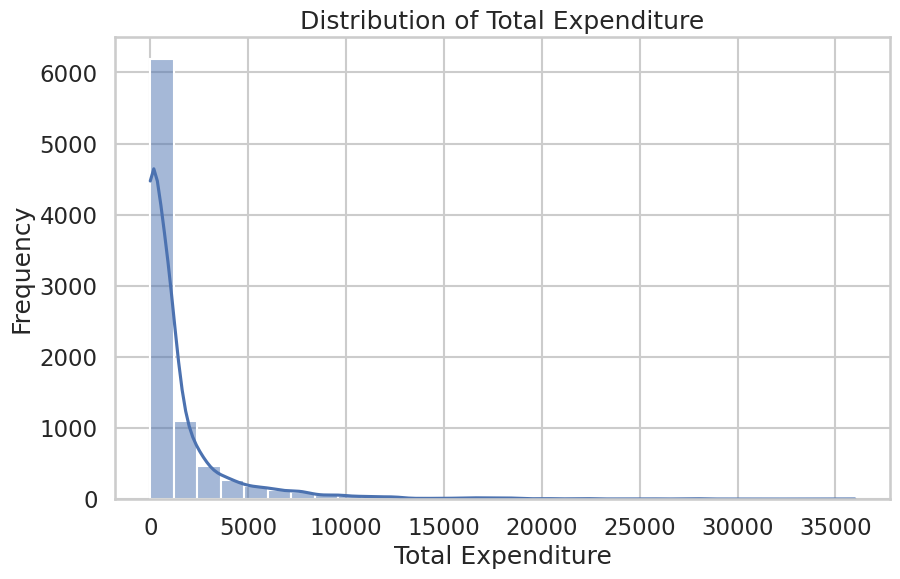

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(train_data['TotalExpenditure'], bins=30, kde=True)
plt.title('Distribution of Total Expenditure')
plt.xlabel('Total Expenditure')
plt.ylabel('Frequency')
plt.show()


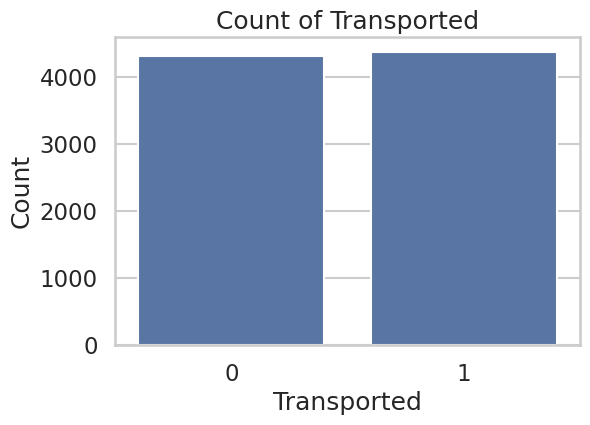

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Transported', data=train_data)
plt.title('Count of Transported')
plt.xlabel('Transported')
plt.ylabel('Count')
plt.show()

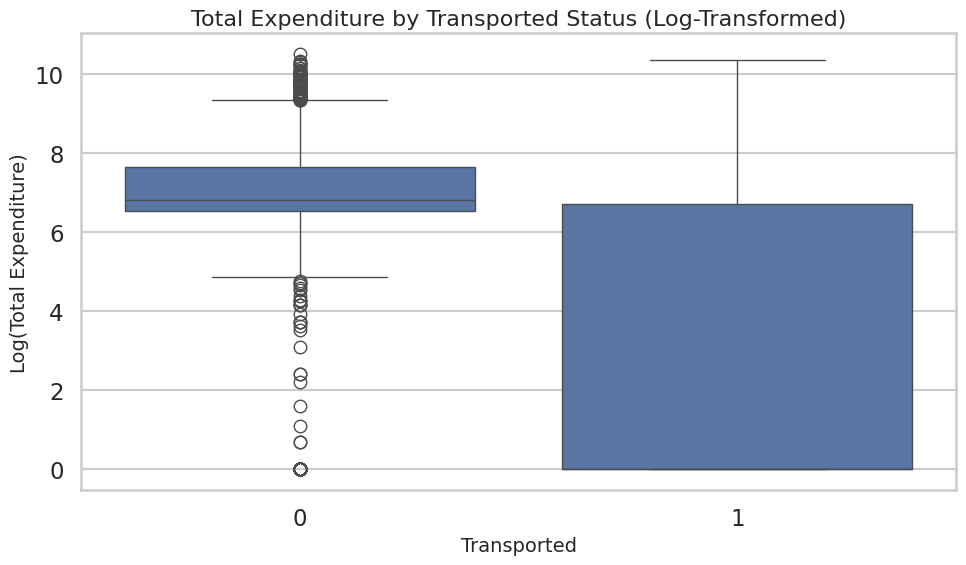

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Log-transform TotalExpenditure to reduce the impact of outliers
train_data['LogTotalExpenditure'] = np.log1p(train_data['TotalExpenditure'])

plt.figure(figsize=(10, 6))

# Create a boxplot using the log-transformed TotalExpenditure
sns.boxplot(x='Transported', y='LogTotalExpenditure', data=train_data)

# Adding titles and labels
plt.title('Total Expenditure by Transported Status (Log-Transformed)', fontsize=16)
plt.xlabel('Transported', fontsize=14)
plt.ylabel('Log(Total Expenditure)', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()


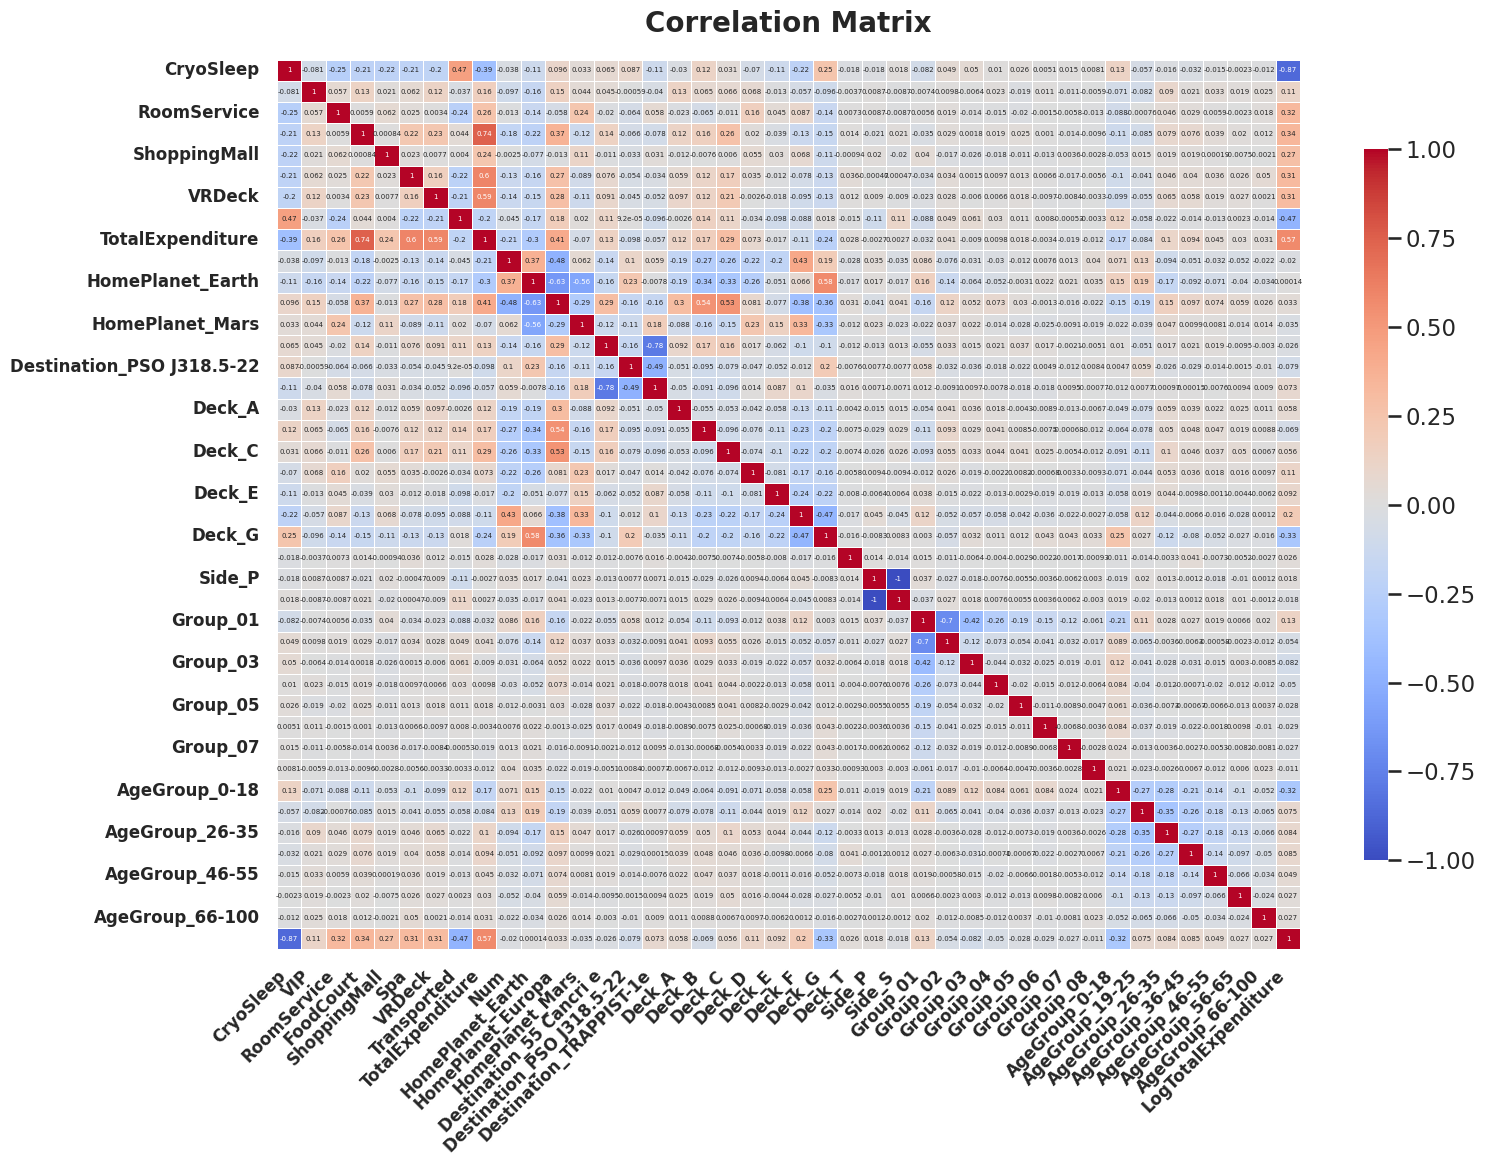

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a modern theme
sns.set_theme(style="whitegrid", context="talk")

# Increase figure size
plt.figure(figsize=(16, 12))

# Compute correlation matrix
correlation_matrix = train_data.corr()

# Create a heatmap with adjusted font size for annotations
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    annot_kws={"size": 5},  # Decrease font size for annotations
    linewidths=0.5,  # Add spacing between cells
    linecolor='white',  # Light grid lines for a clean look
    cbar_kws={"shrink": 0.8, "aspect": 30},  # Customize color bar
)

# Add title with enhanced style
plt.title('Correlation Matrix', fontsize=20, pad=20, weight='bold')

# Customize labels
plt.xticks(fontsize=12, rotation=45, ha='right', weight='bold')
plt.yticks(fontsize=12, weight='bold')

# Ensure layout fits nicely
plt.tight_layout()

# Show the plot
plt.show()


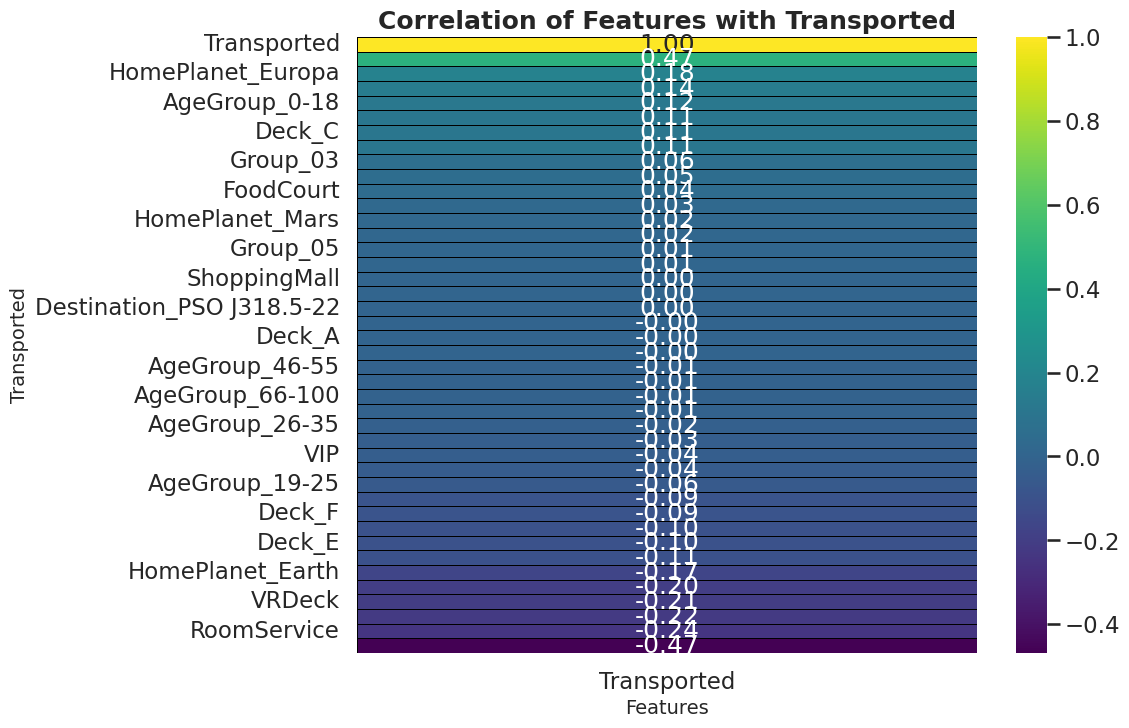

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = train_data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create the heatmap with improved aesthetics
sns.heatmap(correlation_matrix[['Transported']].sort_values(by='Transported', ascending=False),
            annot=True,
            fmt=".2f",  # Format the annotations to 2 decimal places
            cmap='viridis',  # Use a different colormap for better clarity
            cbar=True,
            linewidths=0.5,  # Add lines between cells for better separation
            linecolor='black')  # Make cells square-shaped

# Add title and labels
plt.title('Correlation of Features with Transported', fontsize=18, fontweight='bold')
plt.xlabel('Features', fontsize=14)
plt.ylabel('Transported', fontsize=14)

# Show the plot
plt.show()


In [ ]:
print(train_data.columns.tolist())

['CryoSleep', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported', 'TotalExpenditure', 'Num', 'HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars', 'Destination_55 Cancri e', 'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'Deck_A', 'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G', 'Deck_T', 'Side_P', 'Side_S', 'Group_01', 'Group_02', 'Group_03', 'Group_04', 'Group_05', 'Group_06', 'Group_07', 'Group_08', 'AgeGroup_0-18', 'AgeGroup_19-25', 'AgeGroup_26-35', 'AgeGroup_36-45', 'AgeGroup_46-55', 'AgeGroup_56-65', 'AgeGroup_66-100', 'LogTotalExpenditure']


# Modeling

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Define X (features) and y (target variable)
selected_features = [col for col in train_data.columns if col not in ['Transported','AgeGroup_56-65','Destination_PSO J318.5-22']]
X = train_data[selected_features]  # Feature matrix
y = train_data['Transported']      # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Check the shapes of the resulting datasets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (6085, 39)
X_test shape: (2608, 39)
y_train shape: (6085,)
y_test shape: (2608,)


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import joblib

# XGBOOST

In [ ]:
# Define the XGBoost classifier with the best parameters
xgb_clf = xgb.XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    colsample_bytree=0.9,
    learning_rate=0.2,
    max_depth=5,
    n_estimators=200,
    subsample=0.9
)

# Fit the model on the training data
xgb_clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = xgb_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy: .3f}")

# Detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy:  0.806

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.80      0.80      1289
           1       0.81      0.81      0.81      1319

    accuracy                           0.81      2608
   macro avg       0.81      0.81      0.81      2608
weighted avg       0.81      0.81      0.81      2608


Confusion Matrix:
 [[1031  258]
 [ 247 1072]]


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Standardize the dataset

# Define the Extra Trees Classifier
etc_clf = ExtraTreesClassifier(n_estimators=200, max_depth=5, random_state=42)

# Fit the model on the training data
etc_clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred_etc = etc_clf.predict(X_test)

# Evaluate the model
accuracy_etc = accuracy_score(y_test, y_pred_etc)
print(f"Extra Trees Classifier Accuracy: {accuracy_etc: .3f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_etc))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_etc))


Extra Trees Classifier Accuracy:  0.747

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.82      0.76      1289
           1       0.79      0.67      0.73      1319

    accuracy                           0.75      2608
   macro avg       0.75      0.75      0.75      2608
weighted avg       0.75      0.75      0.75      2608


Confusion Matrix:
 [[1059  230]
 [ 429  890]]


# GB

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Define the Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(n_estimators=200, learning_rate=0.2, max_depth=5, random_state=42)

# Fit the model on the training data
gb_clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred_gb = gb_clf.predict(X_test)

# Evaluate the model
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f"Gradient Boosting Classifier Accuracy: {accuracy_gb: .3f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_gb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))


Gradient Boosting Classifier Accuracy:  0.788

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.78      0.79      1289
           1       0.79      0.79      0.79      1319

    accuracy                           0.79      2608
   macro avg       0.79      0.79      0.79      2608
weighted avg       0.79      0.79      0.79      2608


Confusion Matrix:
 [[1008  281]
 [ 271 1048]]


# Catboost

In [ ]:
from catboost import CatBoostClassifier

# Define the CatBoost Classifier
catboost_clf = CatBoostClassifier(iterations=200, depth=5, learning_rate=0.2, verbose=0)

# Fit the model on the training data
catboost_clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred_catboost = catboost_clf.predict(X_test)

# Evaluate the model
accuracy_catboost = accuracy_score(y_test, y_pred_catboost)
print(f"CatBoost Classifier Accuracy: {accuracy_catboost: .3f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_catboost))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_catboost))


CatBoost Classifier Accuracy:  0.806

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.79      0.80      1289
           1       0.80      0.82      0.81      1319

    accuracy                           0.81      2608
   macro avg       0.81      0.81      0.81      2608
weighted avg       0.81      0.81      0.81      2608


Confusion Matrix:
 [[1017  272]
 [ 234 1085]]


# LR

In [ ]:
from sklearn.linear_model import LogisticRegression

# Define the Logistic Regression Classifier
log_reg_clf = LogisticRegression(max_iter=200, random_state=42)

# Fit the model on the training data
log_reg_clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred_log_reg = log_reg_clf.predict(X_test)

# Evaluate the model
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print(f"Logistic Regression Accuracy: {accuracy_log_reg: .3f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_log_reg))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_log_reg))


Logistic Regression Accuracy:  0.781

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.73      0.77      1289
           1       0.76      0.83      0.79      1319

    accuracy                           0.78      2608
   macro avg       0.78      0.78      0.78      2608
weighted avg       0.78      0.78      0.78      2608


Confusion Matrix:
 [[ 941  348]
 [ 222 1097]]


# RF

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Define the Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=200, max_depth=5, random_state=42)

# Fit the model on the training data
rf_clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = rf_clf.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Classifier Accuracy: {accuracy_rf: .3f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Random Forest Classifier Accuracy:  0.757

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.81      0.77      1289
           1       0.79      0.71      0.75      1319

    accuracy                           0.76      2608
   macro avg       0.76      0.76      0.76      2608
weighted avg       0.76      0.76      0.76      2608


Confusion Matrix:
 [[1038  251]
 [ 382  937]]


# DT

In [ ]:
# Initialize the Decision Tree with the best parameters
decision_tree = DecisionTreeClassifier(
    criterion='gini',
    max_depth=10,
    max_features=None,
    min_samples_leaf=4,
    min_samples_split=5,
    random_state=42  # For reproducibility
)

# Train the model
decision_tree.fit(X_train, y_train)

# Make predictions
y_pred = decision_tree.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.781

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.78      0.78      1289
           1       0.79      0.78      0.78      1319

    accuracy                           0.78      2608
   macro avg       0.78      0.78      0.78      2608
weighted avg       0.78      0.78      0.78      2608


Confusion Matrix:
[[1011  278]
 [ 292 1027]]




![](https://i.postimg.cc/P5sJ7FSd/kitaj-postroit-gigantskij-kosmicheskij-korabl.jpg)

# Using tunned hyperparameter to increase or find better accuracy

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, make_scorer
from catboost import CatBoostClassifier

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# First, let's import the necessary libraries and create a dictionary of hyperparameters to search through:

In [ ]:
# Hyperparameter grids for different models
param_grids = {

    'DecisionTree': {
        'max_depth': [None, 5, 10, 15],
        'min_samples_split': [2, 5, 10]
    },
    'RandomForest': {
        'n_estimators': [100, 200],
        'max_depth': [10, 15],
        'min_samples_split': [2, 5]
    },
    'GradientBoosting': {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5]
    },
    'LogisticRegression': {
        'C': [0.1, 1, 10],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear']
    },
    'CatBoost': {
        'iterations': [100, 200],
        'learning_rate': [0.01, 0.1],
        'depth': [4, 6]
    }
}

In [ ]:
def tune_model(model_name, model, param_grid, X_train, y_train):
    if model_name == 'CatBoost':
        model = CatBoostClassifier(silent=True)  # Suppress output for CatBoost
        search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=5, scoring='accuracy', cv=3, n_jobs=-1)
    else:
        search = GridSearchCV(model, param_grid, scoring='accuracy', cv=3, n_jobs=-1)

    search.fit(X_train, y_train)
    return search.best_estimator_, search.best_params_

In [ ]:
models = {

    'DecisionTree': DecisionTreeClassifier(random_state=2),
    'RandomForest': RandomForestClassifier(random_state=2),
    'GradientBoosting': GradientBoostingClassifier(random_state=2),
    'LogisticRegression': LogisticRegression(random_state=2),
    'CatBoost': CatBoostClassifier(random_state=2)
}

results = {}

for model_name, model in models.items():
    best_model, best_params = tune_model(model_name, model, param_grids[model_name], X_train, y_train)
    y_pred = best_model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results[model_name] = {
        'accuracy': accuracy,
        'f1_score': f1,
        'best_params': best_params
    }

    print(f"{model_name} Best Parameters: {best_params}")
    print(f"{model_name} Accuracy: {accuracy:.3f}")
    print(f"{model_name} F1 Score: {f1:.3f}")
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))

DecisionTree Best Parameters: {'max_depth': 5, 'min_samples_split': 2}
DecisionTree Accuracy: 0.774
DecisionTree F1 Score: 0.783
              precision    recall  f1-score   support

           0       0.79      0.74      0.76      1289
           1       0.76      0.81      0.78      1319

    accuracy                           0.77      2608
   macro avg       0.77      0.77      0.77      2608
weighted avg       0.77      0.77      0.77      2608

[[ 955  334]
 [ 256 1063]]
RandomForest Best Parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}
RandomForest Accuracy: 0.796
RandomForest F1 Score: 0.802
              precision    recall  f1-score   support

           0       0.81      0.77      0.79      1289
           1       0.79      0.82      0.80      1319

    accuracy                           0.80      2608
   macro avg       0.80      0.80      0.80      2608
weighted avg       0.80      0.80      0.80      2608

[[ 997  292]
 [ 240 1079]]
GradientBoos

In [ ]:
# Prepare data for plotting
model_names = list(results.keys())
accuracies = [results[model]['accuracy'] for model in model_names]
f1_scores = [results[model]['f1_score'] for model in model_names]

x = np.arange(len(model_names))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
bars1 = ax.bar(x - width/2, accuracies, width, label='Accuracy')
bars2 = ax.bar(x + width/2, f1_scores, width, label='F1 Score')


In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


# Hyperparamenter tunning

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(n_estimators=200, random_state=42))
])

pipeline.fit(X_train, y_train)
print("Pipeline Accuracy:", pipeline.score(X_test, y_test))


# SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

# Instantiate SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to training data
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check class distribution after SMOTE
print("Class distribution after SMOTE:", dict(pd.Series(y_train_smote).value_counts()))


Class distribution after SMOTE: {1: 3059, 0: 3059}


# Neural Network

In [ ]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build a simple neural network model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))  # First hidden layer with 64 neurons
model.add(Dropout(0.3))  # Dropout layer to prevent overfitting
model.add(Dense(32, activation='relu'))  # Second hidden layer with 32 neurons
model.add(Dropout(0.3))  # Dropout layer
model.add(Dense(1, activation='sigmoid'))  # Output layer with sigmoid activation for binary classification

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=60, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Neural Network Test Accuracy: {accuracy:.2f}")

# Make predictions
y_pred_nn = (model.predict(X_test_scaled) > 0.5).astype(int)

Epoch 1/60
153/153 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6335 - loss: 0.6461 - val_accuracy: 0.7946 - val_loss: 0.4577
Epoch 2/60
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7514 - loss: 0.5144 - val_accuracy: 0.8028 - val_loss: 0.4261
Epoch 3/60
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7720 - loss: 0.4669 - val_accuracy: 0.8077 - val_loss: 0.4132
Epoch 4/60
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7793 - loss: 0.4479 - val_accuracy: 0.8094 - val_loss: 0.4072
Epoch 5/60
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7951 - loss: 0.4267 - val_accuracy: 0.8192 - val_loss: 0.3996
Epoch 6/60
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7945 - loss: 0.4374 - val_accuracy: 0.8151 - val_loss: 0.3985
Epoch 7/60
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7917 - loss: 0.4281 - val_accuracy: 0.8209 - val_loss: 0.3950
Epoch 8/60
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7911 - loss: 0.4245 - val_accuracy: 0.

In [ ]:
accuracy_nn = accuracy_score(y_test, y_pred_nn)
print(f"Accuracy Score: {accuracy_nn:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_nn))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_nn))

Accuracy Score: 0.80

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.81      0.80      1289
           1       0.81      0.78      0.80      1319

    accuracy                           0.80      2608
   macro avg       0.80      0.80      0.80      2608
weighted avg       0.80      0.80      0.80      2608


Confusion Matrix:
 [[1043  246]
 [ 285 1034]]


In [ ]:
# Save the SVM model to a file
joblib.dump(xgb_clf, 'xgb_clf_model.pkl')

print("SVM model saved successfully!")


SVM model saved successfully!


In [ ]:
# Save the SVM model to a file
joblib.dump(xgb_clf, 'catsboot_clf_model.pkl')

print("SVM model saved successfully!")


SVM model saved successfully!


# Test

In [ ]:
test_original = test_data.copy()
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
 14  Deck          8494 non-null   object 
 15  Side          8494 non-null   object 
dtypes: bool(1), float64(6), object(9)
memory usage: 1.0+ MB


In [ ]:
test_data.isnull().sum()

,0
PassengerId,0
HomePlanet,201
CryoSleep,217
Cabin,199
Destination,182
Age,179
VIP,203
RoomService,181
FoodCourt,183
ShoppingMall,208


In [ ]:
# create group column
test_data['Group'] = test_data['PassengerId'].str.split('_').str[1]
# Create a new column 'TotalExpenditure' by summing all expenditure columns
test_data['TotalExpenditure'] = test_data[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(axis=1)
# Split the 'Cabin' column into 'Deck', 'Num', and 'Side'
test_data[['Deck', 'Num', 'Side']] = test_data['Cabin'].str.split('/', expand=True)
# Convert the 'Num' column to numeric
test_data['Num'] = pd.to_numeric(test_data['Num'], errors='coerce')

In [ ]:
# Fill missing 'HomePlanet' values based on the most common HomePlanet within each group
for group in test_data['Group'].unique():
    mode_homeplanet = test_data.loc[test_data['Group'] == group, 'HomePlanet'].mode()
    if not mode_homeplanet.empty:
       test_data.loc[(test_data['Group'] == group) & (test_data['HomePlanet'].isnull()), 'HomePlanet'] = mode_homeplanet[0]

# Fill missing 'CryoSleep' values based on 'TotalExpenditure'
# If 'TotalExpenditure' is 0, set 'CryoSleep' to True; otherwise, set to False
test_data.loc[test_data['CryoSleep'].isnull(), 'CryoSleep'] = test_data['TotalExpenditure'] == 0

# Fill missing 'Deck' and 'Side' values using the mode within each group
for group in test_data['Group'].unique():
    mode_deck = test_data.loc[test_data['Group'] == group, 'Deck'].mode()
    mode_side = test_data.loc[test_data['Group'] == group, 'Side'].mode()

    if not mode_deck.empty:
        test_data.loc[(test_data['Group'] == group) & (test_data['Deck'].isnull()), 'Deck'] = mode_deck[0]
    if not mode_side.empty:
        test_data.loc[(test_data['Group'] == group) & (test_data['Side'].isnull()), 'Side'] = mode_side[0]

# Impute 'Num' with a simple strategy, like filling with the median
test_data['Num'] = test_data['Num'].fillna(test_data['Num'].median())

# Combine 'Deck', 'Num', and 'Side' back into 'Cabin'
test_data['Cabin'] = test_data['Deck'] + '/' + test_data['Num'].astype(str) + '/' + test_data['Side']

# Fill missing 'Destination' values based on the most common value within each group
for group in test_data['Group'].unique():
    mode_destination = test_data.loc[test_data['Group'] == group, 'Destination'].mode()

    if not mode_destination.empty:
        test_data.loc[(test_data['Group'] == group) & (test_data['Destination'].isnull()), 'Destination'] = mode_destination[0]

# Fill missing 'Age' values using the median within each 'HomePlanet'
for planet in test_data['HomePlanet'].unique():
    median_age = test_data.loc[test_data['HomePlanet'] == planet, 'Age'].median()
    test_data.loc[(test_data['HomePlanet'] == planet) & (test_data['Age'].isnull()), 'Age'] = median_age

# Fill missing 'VIP' values with the most frequent value (mode)
test_data['VIP'].fillna(test_data['VIP'].mode()[0], inplace=True)

# Calculate 1/5 of 'TotalExpenditure'
expenditure_fraction = test_data['TotalExpenditure'] / 5

# Fill missing values in each spending-related column with 1/5 of 'TotalExpenditure'
test_data['RoomService'].fillna(expenditure_fraction, inplace=True)
test_data['FoodCourt'].fillna(expenditure_fraction, inplace=True)
test_data['ShoppingMall'].fillna(expenditure_fraction, inplace=True)
test_data['Spa'].fillna(expenditure_fraction, inplace=True)
test_data['VRDeck'].fillna(expenditure_fraction, inplace=True)

# Drop unnecessary columns
test = test_data.drop(columns=['Name', 'Cabin', 'PassengerId'])

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to binary categorical columns
test_data['CryoSleep'] = label_encoder.fit_transform(test['CryoSleep'])
test_data['VIP'] = label_encoder.fit_transform(test['VIP'])

# Perform one-hot encoding on 'HomePlanet' and 'Destination' columns
test = pd.get_dummies(test_data, columns=['HomePlanet', 'Destination'])
# Convert the one-hot encoded columns from True/False to 0/1
test[['HomePlanet_Europa', 'HomePlanet_Mars', 'HomePlanet_Earth', 'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'Destination_55 Cancri e']] = test[['HomePlanet_Europa', 'HomePlanet_Mars', 'HomePlanet_Earth', 'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'Destination_55 Cancri e']].astype(int)
test = pd.get_dummies(test_data, columns=['Deck', 'Side','Group'])

# Identify all columns with boolean (True/False) values
boolean_columns = test.select_dtypes(include=['bool']).columns

# Convert boolean columns to integers (0 and 1)
test[boolean_columns] = test[boolean_columns].astype(int)

# Define age bins and corresponding labels
bins = [0, 18, 25, 35, 45, 55, 65, 100]  # Age ranges for binning
labels = ['0-18', '19-25', '26-35', '36-45', '46-55', '56-65', '66-100']  # Labels for each bin

# Create a new column 'AgeGroup' with the binned age categories
test['AgeGroup'] = pd.cut(test['Age'], bins=bins, labels=labels)

# Drop the 'Age' column
test = test.drop(columns=['Age'])

# Perform one-hot encoding on the 'AgeGroup' column
test = pd.get_dummies(test, columns=['AgeGroup'])
age_group_columns = [col for col in test.columns if 'AgeGroup_' in col]
test[age_group_columns] = test[age_group_columns].astype(int)

# Display the first few rows of the processed test data
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,RoomService,FoodCourt,ShoppingMall,Spa,...,Group_06,Group_07,Group_08,AgeGroup_0-18,AgeGroup_19-25,AgeGroup_26-35,AgeGroup_36-45,AgeGroup_46-55,AgeGroup_56-65,AgeGroup_66-100
0,0001_01,Europa,0,B/0.0/P,TRAPPIST-1e,0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
1,0002_01,Earth,0,F/0.0/S,TRAPPIST-1e,0,109.0,9.0,25.0,549.0,...,0,0,0,0,1,0,0,0,0,0
2,0003_01,Europa,0,A/0.0/S,TRAPPIST-1e,1,43.0,3576.0,0.0,6715.0,...,0,0,0,0,0,0,0,0,1,0
3,0003_02,Europa,0,A/0.0/S,TRAPPIST-1e,0,0.0,1283.0,371.0,3329.0,...,0,0,0,0,0,1,0,0,0,0
4,0004_01,Earth,0,F/1.0/S,TRAPPIST-1e,0,303.0,70.0,151.0,565.0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
joblib.dump(xgb_clf, 'catsboot_clf_model.pkl')

print("SVM model saved successfully!")


SVM model saved successfully!


In [ ]:
import joblib
import pandas as pd

# Load the saved model
best_model = joblib.load('catsboot_clf_model.pkl')

# Get the feature names that the model was trained on
selected_features = best_model.get_booster().feature_names

# Create a list of missing features
missing_features = [feature for feature in selected_features if feature not in test.columns]

# Add missing features to the test dataframe with default value 0
for feature in missing_features:
    test[feature] = 0

# Select these features from the test dataset, ensuring they are in the same order
X_test_selected = test[selected_features]

# Now predict:
y_test_pred = best_model.predict(X_test_selected)

y_test_pred_bool = y_test_pred.astype(bool)

submission = pd.DataFrame({
    'PassengerId': test_original['PassengerId'],
    'Transported': y_test_pred_bool
})

submission.to_csv('submission_catsboot.csv', index=True)
print("CSV file generated successfully using the saved model!")

CSV file generated successfully using the saved model!


In [ ]:

submission

,PassengerId,Transported
0,0001_01,True
1,0002_01,True
2,0003_01,False
3,0003_02,False
4,0004_01,True
...,...,...
8688,9276_01,True
8689,9278_01,True
8690,9279_01,True
8691,9280_01,False
